In [1]:
options(repr.plot.width=8, repr.plot.height=5) #set a common width/height for plots

# Exercise 1
- A researcher has collected $n=15$ observations that are supposed to come from a *Normal* distribution with known variance $\sigma^2 = 16$:

In [2]:
data <- c(26.8, 26.3, 28.3, 28.5, 16.3,
          31.9, 28.5, 27.2, 20.9, 27.5,
          28.0, 18.6, 22.3, 25.0, 31.5)

- Assuming a normal prior for $\mu$, `Norm(m=20, s^2=25)`:

(a) Determine the posterior distribution $P(\mu|y_1, \dots, y_{15})$ and find the posterior mean and standard deviation

The posterior is a normal distribution with mean $m'$ and variance $(s')^2$ given by:
$$\frac{1}{(s')^2} = \frac{\sigma^2 + n s^2}{\sigma^2 s^2}\qquad m'=\frac{1/s^2}{n/\sigma^2 + 1/s^2} m + \frac{n/\sigma^2}{n/\sigma^2 + 1/s^2} \bar{y} $$
Where $(m, s^2)$ are mean and variance of the prior, $\sigma^2$ is the variance of the likelihood, $n$ is the number of observations $\{y_i\}_{i=1,\dots,n}$ and $\bar{y}$ is their sample mean:
$$\bar{y} = \frac{1}{n} \sum_{j=1}^n y_j$$

In [3]:
sigma.sq <- 16
s.sq <- 25
m <- 20

y.mean <- mean(data)
n <- length(data)

m.prime <- (1 / s.sq) / (n / sigma.sq + 1 / s.sq) * m + (n / sigma.sq) / (n / sigma.sq + 1 / s.sq) * y.mean
s.prime.sq <- sigma.sq * s.sq / (sigma.sq + n * s.sq)

sprintf("The posterior is a Normal distribution with mean m' = %.3f and variance (s')^2 = %.3f", m.prime, s.prime.sq)

[1] "The posterior is a Normal distribution with mean m' = 25.601 and variance (s')^2 = 1.023"

(b) Find the $95\%$ credibility interval for $\mu$

In [4]:
ci <- c(qnorm(.05/2, mean = m.prime, sd = sqrt(s.prime.sq)), qnorm(1 - (0.05/2), mean = m.prime, sd = sqrt(s.prime.sq)))
sprintf("The 95%% credibility interval for mu is: [%.3f, %.3f]", ci[1], ci[2])

[1] "The 95% credibility interval for mu is: [23.619, 27.583]"

(c) Plot the *posterior* distribution, indicating on the same plot: the mean value, the standard deviation, and the $95\%$ credibility interval.

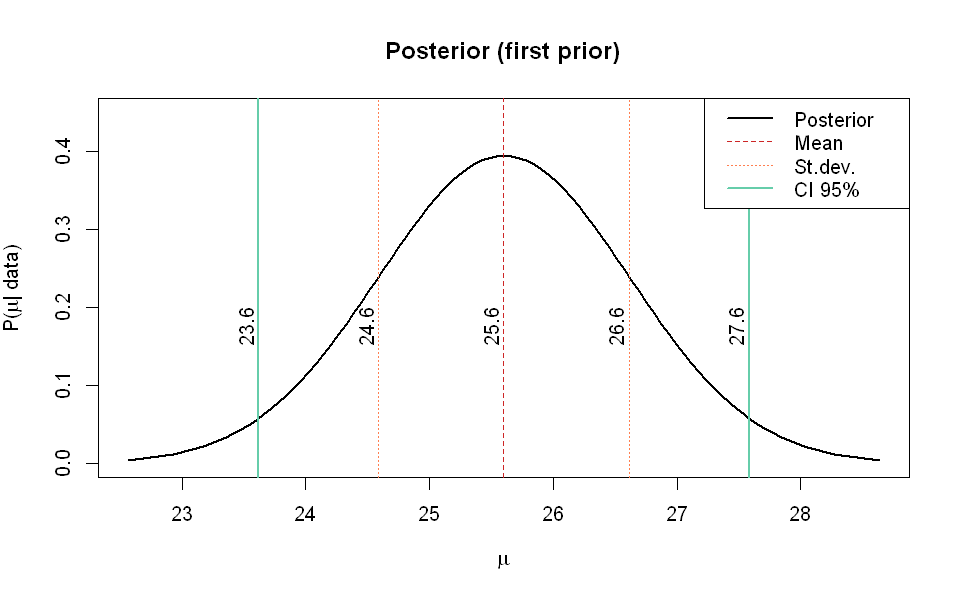

In [5]:
limits <- c(m.prime - 3 * sqrt(s.prime.sq), m.prime + 3*sqrt(s.prime.sq))
plot(0, 0, "n", xlab=expression(mu), ylab = expression(paste("P(", mu, "| data)")), xlim=limits, ylim = c(0,0.45),
     main = "Posterior (first prior)")
curve(dnorm(x, mean = m.prime, sd = sqrt(s.prime.sq)), from = limits[1], to = limits[2], add=TRUE, lwd=2)

abline(v = m.prime, lty = 2, col = 'firebrick3')
abline(v = c(m.prime - sqrt(s.prime.sq), m.prime + sqrt(s.prime.sq)), lty = 3, col = 'coral')
abline(v = ci, col = 'aquamarine3', lty=1, lwd=2)
text(m.prime - sqrt(s.prime.sq), .2, signif(m.prime - sqrt(s.prime.sq),3), srt=90, pos=2)
text(m.prime + sqrt(s.prime.sq), .2, signif(m.prime + sqrt(s.prime.sq),3), srt=90, pos=2)
text(m.prime, .2, signif(m.prime, 3), srt=90, pos=2)
text(ci[1], .2, signif(ci[1],3), srt=90, pos=2)
text(ci[2], .2, signif(ci[2],3), srt=90, pos=2)


legend("topright", c("Posterior", "Mean", "St.dev.", "CI 95%"),
                   lwd=c(2, 1, 1, 2), col=c('black', 'firebrick3', 'coral', 'aquamarine3'),
                   lty = c(1, 2, 3, 1), y.intersp=1.5)

(d) Repeat the analysis using a different prior `Norm(m=30, s^2=16)` and plot, on the same graph, the likelihood, the prior and the posterior.

[1] "The posterior is a Normal distribution with mean m' = 26.100 and variance (s')^2 = 1.000"

[1] "The 95% credibility interval for mu is: [24.140, 28.060]"

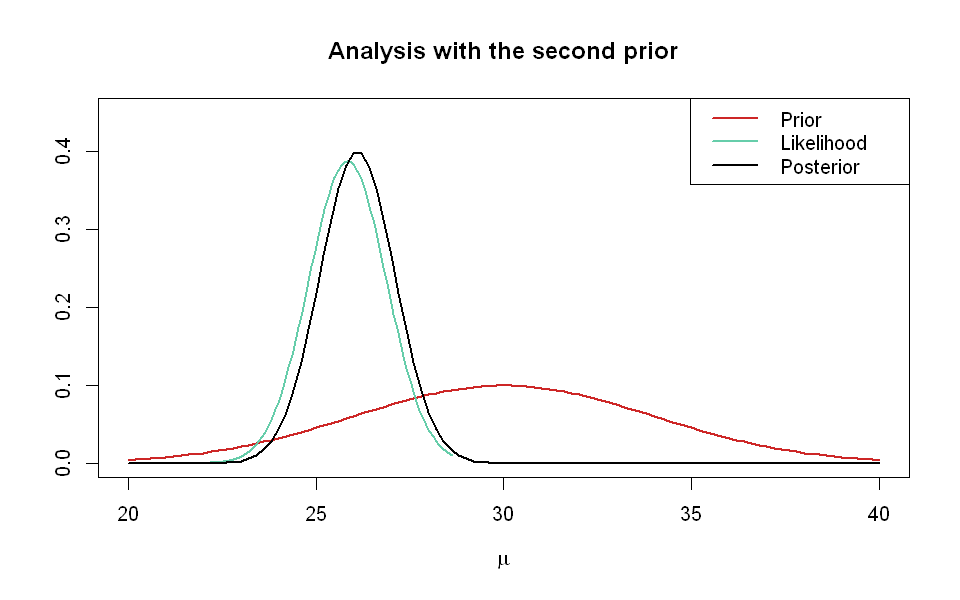

In [6]:
m2 <- 30
s2.sq <- 16

m2.prime <- (1 / s2.sq) / (n / sigma.sq + 1 / s2.sq) * m2 + (n / sigma.sq) / (n / sigma.sq + 1 / s2.sq) * y.mean
s2.prime.sq <- sigma.sq * s2.sq / (sigma.sq + n * s2.sq)

sprintf("The posterior is a Normal distribution with mean m' = %.3f and variance (s')^2 = %.3f", m2.prime, s2.prime.sq)

ci2 <- c(qnorm(.05/2, mean = m2.prime, sd = sqrt(s2.prime.sq)), qnorm(1 - (0.05/2), mean = m2.prime, sd = sqrt(s2.prime.sq)))
sprintf("The 95%% credibility interval for mu is: [%.3f, %.3f]", ci2[1], ci2[2])

prior <- function(mu) {
    dnorm(mu, mean = m2, sd = sqrt(s2.sq))
}

likelihood <- function(mu) { #Plot as a function of mu (as it must be on the same plot)
    res <- seq(length(mu))
    
    for (i in seq_along(mu)) {
        res[i] <- prod(dnorm(data, mean = mu[i], sd = sqrt(sigma.sq)))        
    }
    return(res)
}

posterior <- function(mu) {
    dnorm(mu, mean = m2.prime, sd = sqrt(s2.prime.sq))
}

limits2 <- c(20, 40)
xs = seq(from = limits2[1], to = limits[2], length.out=100)
plot(0, 0, "n", xlab=expression(mu), ylab = "", xlim=limits2, ylim = c(0,0.45),
     main = "Analysis with the second prior")
curve(prior(x), from = limits2[1], to = limits2[2], add=TRUE, lwd=2, col = 'firebrick3')

like <- likelihood(xs)
#Normalize
like <- like / (sum(like) * (xs[2] - xs[1]))

lines(xs, like, lwd=2, col = 'aquamarine3')
curve(posterior(x), from = limits2[1], to = limits2[2], add=TRUE, lwd=2, col = 'black')

legend("topright", c("Prior", "Likelihood", "Posterior"),
       lwd=c(2,2,2), col=c("firebrick3", "aquamarine3", "black"), y.intersp=1.5)

(e) Compare the credibility intervals obtained with the two priors.

In [7]:
ci2[2] - ci2[1]

[1] 3.919928

In [8]:
ci[2] - ci[1]

[1] 3.964786

The two CI intervals cover a similar range of values for $\mu$. One notable difference is in their position: the second CI is moved "to the right" with respect to the first. This is because the second prior is centred around a larger value than the first one.

# Exercise 2
- A researcher has collected $n=16$ observations that are supposed to come from a *Normal* distribution with known variance $\sigma^2 = 4$:

In [9]:
obs <- c(4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78,
         4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47)

Assuming the prior is a step function:
$$g(\mu) = \begin{cases}
\mu & 0 < \mu \leq 3\\
3 & 3 < \mu \leq 5 \\
8-\mu & 5 < \mu \leq 8\\
0 & \mu > 8
\end{cases}$$

(a) Find the posterior distribution, the posterior mean and standard deviation.

In [10]:
g <- function(mu) {
    ifelse(0 < mu & mu <= 3, mu, 
    ifelse(3 < mu & mu <= 5, 3,
    ifelse(5 < mu & mu <= 8, 8-mu, 0)))
}

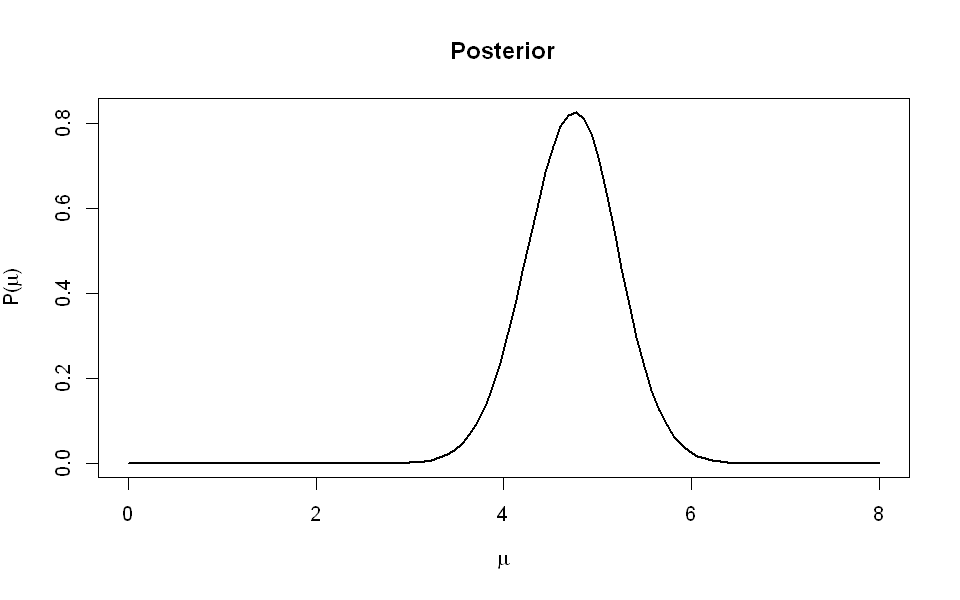

In [11]:
xs <- seq(from = 0, to = 8, length.out=100)
sigma2.sq <- 4

likelihood.g <- function(mu) { #Unnormalized
    res <- seq_along(mu)
    for (i in seq_along(mu)) {
        res[i] <- prod(dnorm(obs, mean = mu[i], sd = sqrt(sigma2.sq)))
    }
    return(res)
}

norm <- sum(likelihood.g(xs)) * (xs[2] - xs[1])

like.g <- likelihood.g(xs) / norm

posterior.g <- g(xs) * like.g
posterior.g <- posterior.g / (sum(posterior.g) * (xs[2] - xs[1])) #Normalize posterior

plot(xs, posterior.g, "l", xlab=expression(mu), ylab=expression(paste("P(",mu,")")), main = "Posterior", lwd = 2)

In [12]:
post.mean  <- sum(xs * posterior.g) * (xs[2] - xs[1])
post.stdev <- sqrt(sum((xs - post.mean)^2 * posterior.g) * (xs[2] - xs[1]))
sprintf("Posterior mean: %.3f, Posterior st.dev.: %.3f", post.mean, post.stdev)

[1] "Posterior mean: 4.725, Posterior st.dev.: 0.484"

(b) Find the $95\%$ credibility interval for $\mu$.

In [13]:
#Compute CDF
post.cdf <- cumsum(posterior.g) * (xs[2] - xs[1])

ci_classes <- findInterval(post.cdf, c(0.05/2, 1- 0.05/2))
#Splits an ordered sequence in classes separated by the values 0.05/2 and 1-0.05/2. 
ci.g <- xs[which(diff(ci_classes) == 1) + 1] #Get the position of these boundaries

sprintf("Credibility interval 95%%: [%.3f, %.3f]", ci.g[1], ci.g[2])

[1] "Credibility interval 95%: [3.798, 5.657]"

(c) Plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation, and the $95\%$ credibility interval.

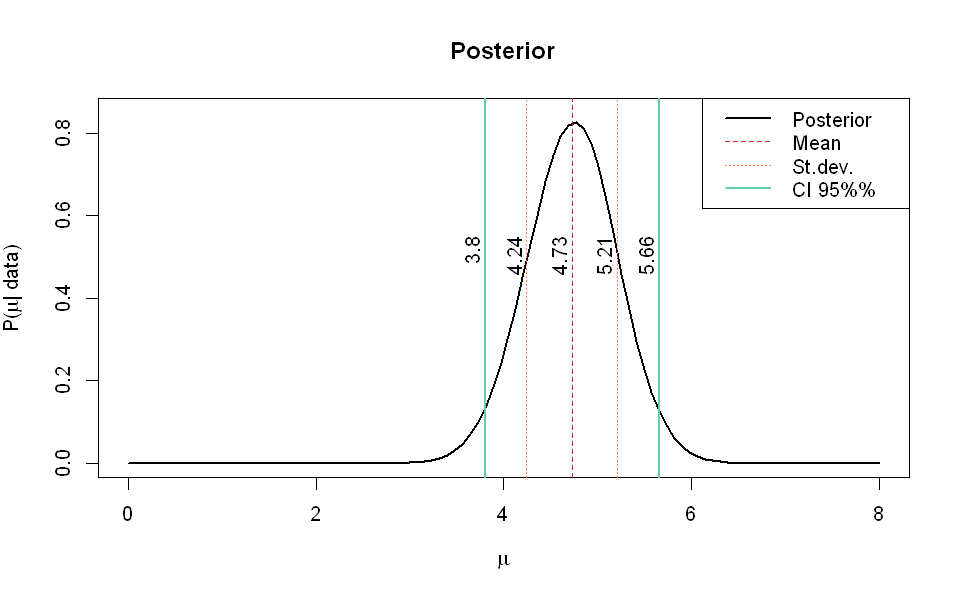

In [14]:
limits <- c(0,8)
plot(xs, posterior.g, "l", xlab=expression(mu), ylab = expression(paste("P(", mu, "| data)")), xlim=limits, ylim = c(0,0.85),
     main = "Posterior", lwd=2)

abline(v = post.mean, lty = 2, col = 'firebrick3')
abline(v = c(post.mean - post.stdev, post.mean + post.stdev), lty = 3, col = 'coral')
abline(v = ci.g, col = 'aquamarine3', lty=1, lwd=2)
text(post.mean - post.stdev, .55, signif(post.mean - post.stdev,3), srt=90, pos=2)
text(post.mean + post.stdev, .55, signif(post.mean + post.stdev,3), srt=90, pos=2)
text(post.mean, .55, signif(post.mean, 3), srt=90, pos=2)
text(ci.g[1], .55, signif(ci.g[1],3), srt=90, pos=2)
text(ci.g[2], .55, signif(ci.g[2],3), srt=90, pos=2)

legend("topright", c("Posterior", "Mean", "St.dev.", "CI 95%%"),
                   lwd=c(2, 1, 1, 2), col=c('black', 'firebrick3', 'coral', 'aquamarine3'),
                   lty = c(1, 2, 3, 1), y.intersp=1.5)

(d) Plot, on the same graph, the prior, the likelihood and the posterior distribution.

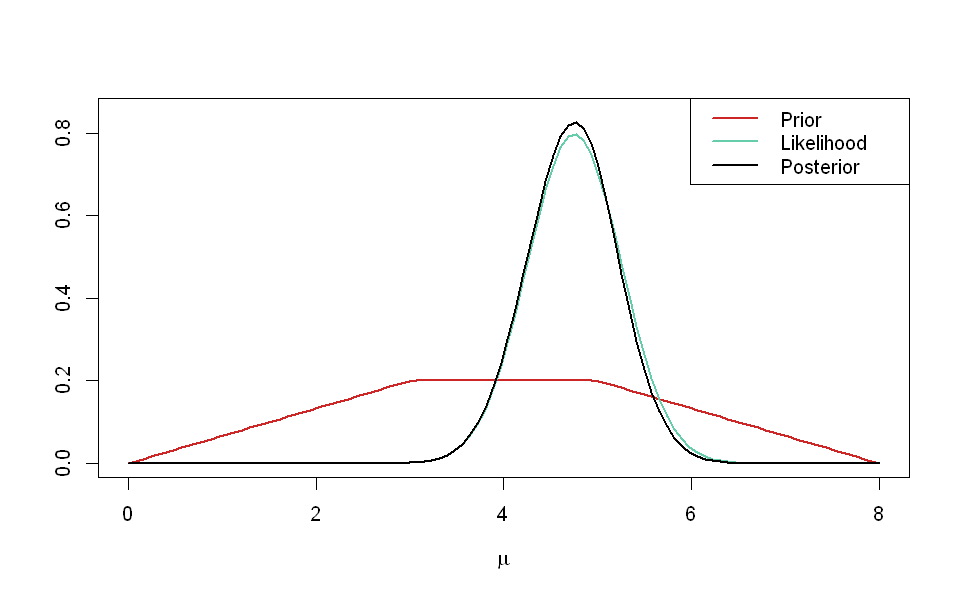

In [15]:
limits2 <- c(0,8)

prior.g <- g(xs)
prior.g <- prior.g / (sum(prior.g) * (xs[2] - xs[1])) #Normalize prior
plot(xs, prior.g, "l", xlab=expression(mu), ylab = "", xlim=limits2, ylim = c(0,0.85), lwd=2, col="firebrick3")
lines(xs, like.g, lwd=2, col='aquamarine3')
lines(xs, posterior.g, lwd=2, col = "black")

legend("topright", c("Prior", "Likelihood", "Posterior"),
       lwd=c(2,2,2), col=c("firebrick3", "aquamarine3", "black"), y.intersp=1.5)

# Exercise 3
- In a study on water quality of streams, a high level of bacterium $X$ was defined as a level greater than $100$ per $100\>\mathrm{ml}$ of stream water. $n=116$ samples were taken from streams having a high environmental impact on pandas. Out of these, $y=11$ had a high bacterium $X$ level.
- Indicating with $p$ the probability that a sample of water taken from the stream has a high bacterium $X$ level:

(a) Find the frequentist estimator for $p$

Each sample of water is contaminated with bacterium $X$ with a fixed probability $p$. Then, then amount $Y$ of polluted samples follows a Binomial distribution. In the **frequentist** approach, one unbiased estimator for $p$ is given by the ratio of *successes* over *trials*, i.e.
$$\hat{p}_F = y / n$$

In [16]:
y <- 11
n <- 116

pF <- y / n

sprintf("Frequentist estimate for p: %.3f", pF)

[1] "Frequentist estimate for p: 0.095"

(b) Using a `Beta(1,10)` prior for $p$, calculate the posterior distribution $P(p|y)$.

As the prior is a beta distribution with parameters $\alpha_p$ and $\beta_p$, if we measure $y$ successes over $n$ trials, the posterior is still a beta distribution with parameters $\alpha$ and $\beta$ given by:
$$\alpha = \alpha_p + y \qquad \beta = \beta_p + n - y$$

In [17]:
prior.alpha <- 1
prior.beta  <- 10

post.alpha <- prior.alpha + y
post.beta  <- prior.beta  + n - y

posterior.func <- function(x) {
    dbeta(x, post.alpha, post.beta)
}

(c) Find the Bayesian estimator for $p$, the posterior mean and variance, and a $95\%$ credibility interval.

The Bayesian estimator for $p$ is given by the *maximum* of the posterior, which in this case is given by the following analytical expression:
$$\hat{p}_B = \frac{\alpha - 1}{\alpha + \beta - 2}$$
where $(\alpha,\beta)$ are the shape parameters of the posterior (which is a Beta distribution).

In [18]:
beta_max <- function(alpha, beta) {
    return( (alpha - 1) / (alpha + beta - 2) )
}

pB <- beta_max(post.alpha, post.beta)
sprintf("Bayesian estimate for p: %.3f", pB)

[1] "Bayesian estimate for p: 0.088"

For a Beta distribution with parameters $(\alpha, \beta)$, mean $\mathbb{E}[X]$ and variance $\mathrm{Var}[X]$ are given by:
$$\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta} \qquad \mathrm{Var}[X] = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$$

In [19]:
beta_mean <- function(alpha, beta) {
    return(alpha / (alpha + beta))
}

beta_variance <- function(alpha, beta) {
    return(alpha * beta / ((alpha + beta)^2 * (alpha + beta + 1)))
}

beta_CI <- function(alpha, beta, p) {
    proba <- 1 - p/100
    left <- proba / 2
    right <- 1 - proba / 2
    
    return(c(qbeta(left, alpha, beta), qbeta(right, alpha, beta)))
}

In [20]:
post.mean <- beta_mean(post.alpha, post.beta)
post.variance <- beta_variance(post.alpha, post.beta)

#CI interval found by "subtracting" tails:
post.ci <- beta_CI(post.alpha, post.beta, 95)

sprintf("Mean: %.5f, Variance: %.5f, CI [95%%]: [%.3f, %.3f]", post.mean, post.variance, post.ci[1], post.ci[2])

[1] "Mean: 0.09449, Variance: 0.00067, CI [95%]: [0.050, 0.151]"

(d) Test the hypothesis:
$$ H_0 \colon p=0.1 \> \mathrm{versus} \> H_1 \colon p \neq 0.1 $$
at a $5\%$ level of significance with both the frequentist and bayesian approach.

**Frequentist approach**

A two-sides hypothesis test is required, as we want to assess any kind of deviation from $p=0.1$. First, a rejection region is constructed by selecting $a$ and $b$ such that $P(Y \leq a) \cup P(Y \geq b) = \alpha$, or it is slightly less than $\alpha$. In this case, $a = 5$ and $b = 19$:

In [21]:
#Area in rejection region:
rejection <- pbinom(5, n, .1) + pbinom(19-1, n, .1, lower.tail=FALSE) #P(Y <= 5) U P(Y >= 19)
sprintf("Area in rejection region: %.3f", rejection)

[1] "Area in rejection region: 0.043"

We observe $y=11$, which lies inside the acceptance region $[6,18]$, and so the null hypothesis is accepted.

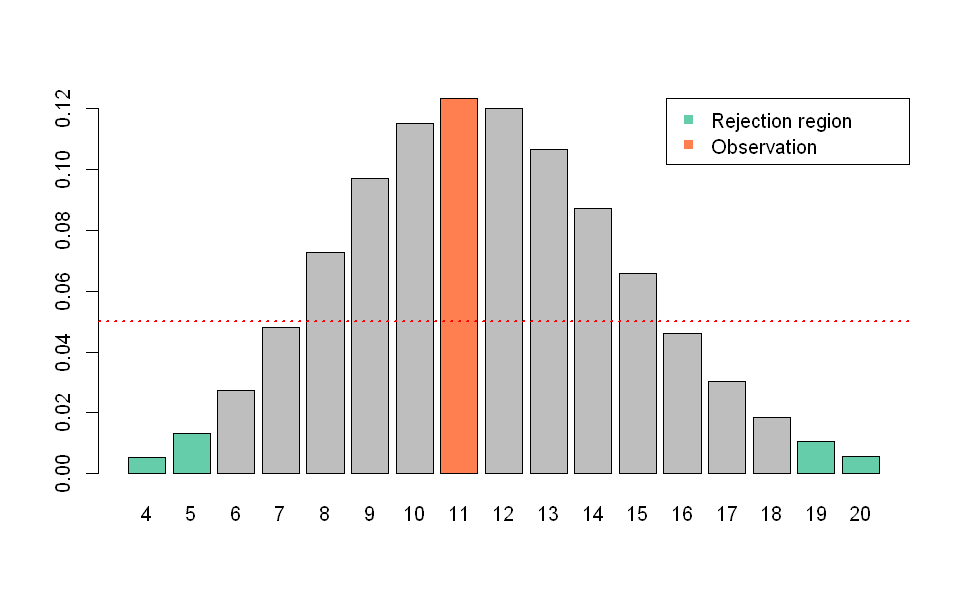

In [22]:
rej.a <- 5
rej.b <- 19

limits <- c(4,20)
colors <- rep('gray', limits[2] - limits[1] + 1)
colors[y+1-limits[1]] <- 'coral'

colors[seq(limits[1]:rej.a+ 1 - limits[1])] <- 'aquamarine3'
colors[seq(rej.b, limits[2]) + 1 - limits[1]] <- 'aquamarine3'

cols <- seq(from=limits[1], to=limits[2])
barplot(dbinom(cols, n, 0.1), col = colors, names.arg = cols)
abline(h = .05, col = 'red', lty = 3, lwd = 2) #Is this necessary?

legend("topright", c("Rejection region", "Observation"), col=c("aquamarine3", "coral"), pch=15, y.intersp=1.5)

**Bayesian approach**

$p=0.1$ falls into the previously computed 95% CI ($[0.050, 0.15]$), so the null hypothesis is accepted at a level of significance $5\%$.

- A new measurement, performed one month later on $n=165$ water samples, gives $y=9$ high bacterium $X$ level. 

(e) Find the frequentist estimator for $p$

As in the previous case, the frequentis estimator for a Binomial variable is:
$$\hat{p}_F = \frac{y}{n} $$ 

In [23]:
n2 <- 165
y2 <- 9
pF2 <- y2 / n2

sprintf("Frequentist estimate for p: %.3f", pF2)

[1] "Frequentist estimate for p: 0.055"

(f) Find a bayesian estimator for $p$, assuming both a `Beta(1,10)` prior for $p$, and assuming the posterior probability of the older measurement as the prior for the new one.

In [24]:
#Beta(1,10) prior
post_a.alpha <- 1 + y2
post_a.beta  <- 10 + n2 - y2

post_a.max <- beta_max(post_a.alpha, post_a.beta)

sprintf("Bayesian estimate with Beta(1,10) prior: %.3f", post_a.max)

[1] "Bayesian estimate with Beta(1,10) prior: 0.052"

In [25]:
#Old posterior as new prior
post_b.alpha <- post.alpha + y2
post_b.beta  <- post.beta + n2 - y2

post_b.max <- beta_max(post_b.alpha, post_b.beta)

sprintf("Bayesian estimate with old posterior as prior: %.3f", post_b.max)

[1] "Bayesian estimate with old posterior as prior: 0.069"

(g) Find the bayesian estimator for $p$, the posterior mean and variance, and a $95\%$ credibility interval.

In [26]:
post_a.mean <- beta_mean(post_a.alpha, post_a.beta)
post_a.variance <- beta_variance(post_a.alpha, post_a.beta)
post_a.ci <- beta_CI(post_a.alpha, post_a.beta, 95)

sprintf("Posterior with Beta(1,10) prior: Mean is %.3f, Variance is %.4f, 95%% CI: [%.3f, %.3f]",
        post_a.mean, post_a.variance, post_a.ci[1], post_a.ci[2])

post_b.mean <- beta_mean(post_b.alpha, post_b.beta)
post_b.variance <- beta_variance(post_b.alpha, post_b.beta)
post_b.ci <- beta_CI(post_b.alpha, post_b.beta, 95)

sprintf("Posterior with old posterior as prior: Mean is %.3f, Variance is %.4f, 95%% CI: [%.3f, %.3f]",
        post_b.mean, post_b.variance, post_b.ci[1], post_b.ci[2])

[1] "Posterior with Beta(1,10) prior: Mean is 0.057, Variance is 0.0003, 95% CI: [0.028, 0.095]"

[1] "Posterior with old posterior as prior: Mean is 0.072, Variance is 0.0002, 95% CI: [0.045, 0.104]"

(h) Test the hypothesis:
$$ H_0 \colon p=0.1 \> \mathrm{versus} \> H_1\colon p\neq 0.1$$
at a $5\%$ level of significance with both the frequentist and bayesian approach.

**Frequentist approach**

In this case, the rejection region is given by $Y \leq 7$ and $Y \geq 24$. As the observation is $y=9$, it still lies in the accepted region, and so $H_0$ is accepted.

In [27]:
#Area in rejection region:
rejection <- pbinom(7, n2, .1) + pbinom(24-1, n2, .1, lower.tail=FALSE) #P(Y <= 5) U P(Y >= 24)
sprintf("Area in rejection region: %.3f", rejection)

[1] "Area in rejection region: 0.045"

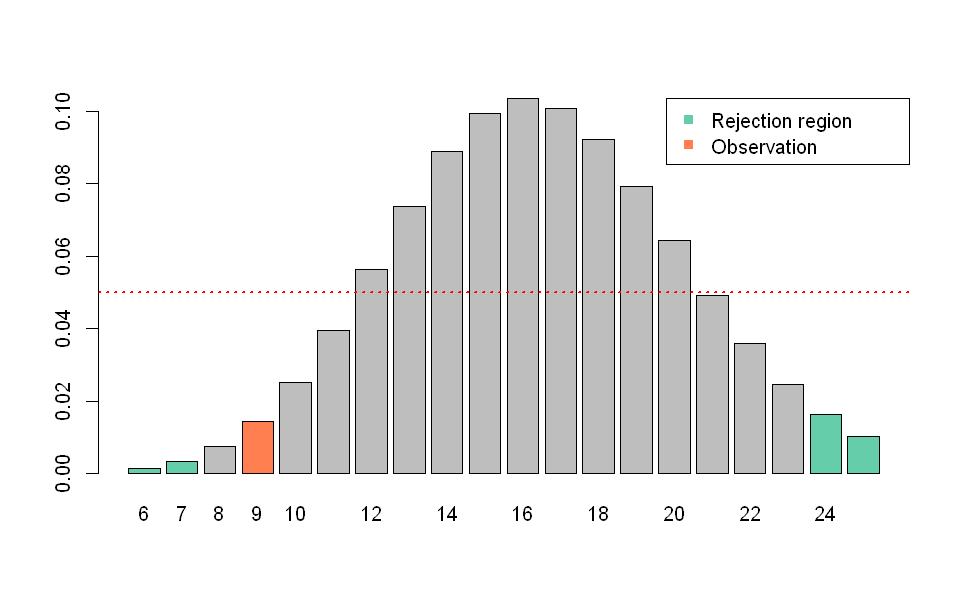

In [28]:
rej.a <- 7
rej.b <- 24

limits <- c(6,25)
colors <- rep('gray', limits[2] - limits[1] + 1)
colors[y2+1-limits[1]] <- 'coral'

colors[seq(limits[1]:rej.a+ 1 - limits[1])] <- 'aquamarine3'
colors[seq(rej.b, limits[2]) + 1 - limits[1]] <- 'aquamarine3'

cols <- seq(from=limits[1], to=limits[2])
barplot(dbinom(cols, n2, .1), col = colors, names.arg = cols)
abline(h = .05, col = 'red', lty = 3, lwd = 2) #Is this necessary?

legend("topright", c("Rejection region", "Observation"), col=c("aquamarine3", "coral"), pch=15, y.intersp=1.5)

**Bayesian approach**

$p=0.1$ is *not* contained in the first CI ($[0.028, 0.095]$) with the `Beta(1,10)` prior, and so the null hypothesis is rejected. On the other hand, $p=0.1$ is contained in the second CI ($[0.045, 0.104]$) with the old posterior and so there the null hypothesis is accepted.